In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import ternary
import matplotlib.pyplot as plt
from qupath_filter_viz_functions import coordFilter, channelFilter, clusterFilter, stackedBar, imageMask, emptyMatrixViz

In [2]:
df = pd.read_csv('test files\hdb_results.csv')
#df = pd.read_csv('test files\kmeans_results2.csv')
df = df.sort_values(by='ratio_red',ascending=False)

In [3]:
def hexColor(r,g,b):
    return '#%02x%02x%02x' % (int(r),int(g),int(b))

df['hex'] = df[['rgb_red','rgb_green','rgb_blue']].apply(lambda x:hexColor(*x),axis=1)

In [4]:
#cluster =-1 is noise
#return 10 bigegst clusters 
pivot = df.groupby('c_label').count().sort_values(by='cell_index',ascending=False)
pivot[['cell_index']]

,cell_index
c_label,
-1.0,3905
135.0,85
36.0,82
44.0,70
25.0,61
...,...
6.0,10
46.0,10
47.0,10


In [6]:
stackedBar(df[df['cluster_bool']=='Y'],False,'cluster_bool')

Loading BokehJS ...

In [27]:
stackedBar(df,True,'channel_bool')

Loading BokehJS ...

In [5]:
#modules for k means viz with cluster centres

#create dataframe containing centroid values and rgb values to retrun hex colour for viz
cluster_df = pd.DataFrame()

k_centres = np.array([[0.56501174, 0.26329134, 0.21423593],
       [0.04028373, 0.08669979, 0.22511556],
       [0.12611273, 0.17516961, 0.57018829],
       [0.10640746, 0.27423442, 0.08266362],
       [0.28169401, 0.0837013 , 0.09881102]])


cluster_df['r_centre'] = k_centres[:,0]
cluster_df['g_centre'] = k_centres[:,1]
cluster_df['b_centre'] = k_centres[:,2]

cluster_df['r'] = k_centres[:,0]*df['channel_red'].max()
cluster_df['g'] = k_centres[:,1]*df['channel_green'].max()
cluster_df['b'] = k_centres[:,2]*df['channel_blue'].max()

cluster_df['sum'] = cluster_df['r'] + cluster_df['g'] + cluster_df['b']

cluster_df['ratio_r'] = (cluster_df['r']/cluster_df['sum'])
cluster_df['ratio_g'] = (cluster_df['g']/cluster_df['sum'])
cluster_df['ratio_b'] = (cluster_df['b']/cluster_df['sum'])

cluster_df['rgb_r'] = cluster_df['ratio_r']*255
cluster_df['rgb_g'] = cluster_df['ratio_g']*255
cluster_df['rgb_b'] = cluster_df['ratio_b']*255

cluster_df['hex'] = cluster_df[['rgb_r', 'rgb_g', 'rgb_b']].apply(lambda x:hexColor(*x),axis=1)

In [48]:
slice_df.loc[j].get('ratio_red')

0.4314981397249307

In [9]:
denoise = df['c_label'] != -1
df2 = df[denoise]

In [38]:
-1 in clusters

False

In [44]:
df

,cell_index,centroid_x,centroid_y,channel_nucleus,nucleus_area,nucleus_circularity,channel_red,channel_green,channel_blue,channel_sum,...,rgb_green,rgb_blue,rel_red,rel_green,rel_blue,c_label,c_probability,hex,cluster_bool,cluster_hex
0,cell_6830,1373,2788,17502.9902,73.08,0.7786,23001.1152,1128.2632,485.5311,24614.9095,...,11.688327,5.029896,0.353174,0.018233,0.007410,92.0,1.000000,#ee0b05,N,#eb0d06
1,cell_6252,1261,2557,25920.4844,87.48,0.9037,34966.1758,1841.2782,708.1855,37515.6395,...,12.515472,4.813654,0.536893,0.029755,0.010808,54.0,1.000000,#ed0c04,N,#e90d06
2,cell_6105,1010,2502,40652.6992,69.48,0.9452,34621.3516,1813.3815,716.5516,37151.2847,...,12.446737,4.918286,0.531598,0.029304,0.010936,54.0,1.000000,#ed0c04,N,#e90d06
3,cell_6435,587,2639,33203.6133,104.40,0.7771,27918.5547,1463.8356,607.0137,29989.4040,...,12.446999,5.161439,0.428679,0.023655,0.009264,81.0,0.760781,#ed0c05,N,#ea0d06
4,cell_4400,2792,1826,22549.3457,106.20,0.8531,25000.5566,1246.1711,615.6745,26862.4022,...,11.829680,5.844488,0.383874,0.020138,0.009396,81.0,1.000000,#ed0b05,N,#ea0d06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,cell_1289,796,562,25493.2812,111.24,0.9092,169.7055,3964.3269,51047.6328,55181.6652,...,18.319552,235.896222,0.002606,0.064063,0.779063,90.0,1.000000,#0012eb,N,#0113ea
6989,cell_4754,307,1966,13896.8779,55.44,0.8446,139.2115,3615.8782,45542.0625,49297.1522,...,18.703899,235.576000,0.002138,0.058432,0.695040,111.0,1.000000,#0012eb,N,#0112ea
6990,cell_5295,2395,2175,43411.5117,34.20,0.7324,170.7500,6640.6602,65524.3594,72335.7696,...,23.409834,230.988234,0.002622,0.107312,1.000000,13.0,1.000000,#0017e6,N,#0116e7
6991,cell_4860,2696,2004,23002.2871,63.72,0.8949,166.3094,5651.0444,65360.0039,71177.3577,...,20.245432,234.158748,0.002554,0.091320,0.997492,13.0,1.000000,#0014ea,N,#0116e7


100%|█████████████████████████████████████████████████████████████████████████████| 3088/3088 [00:08<00:00, 366.42it/s]


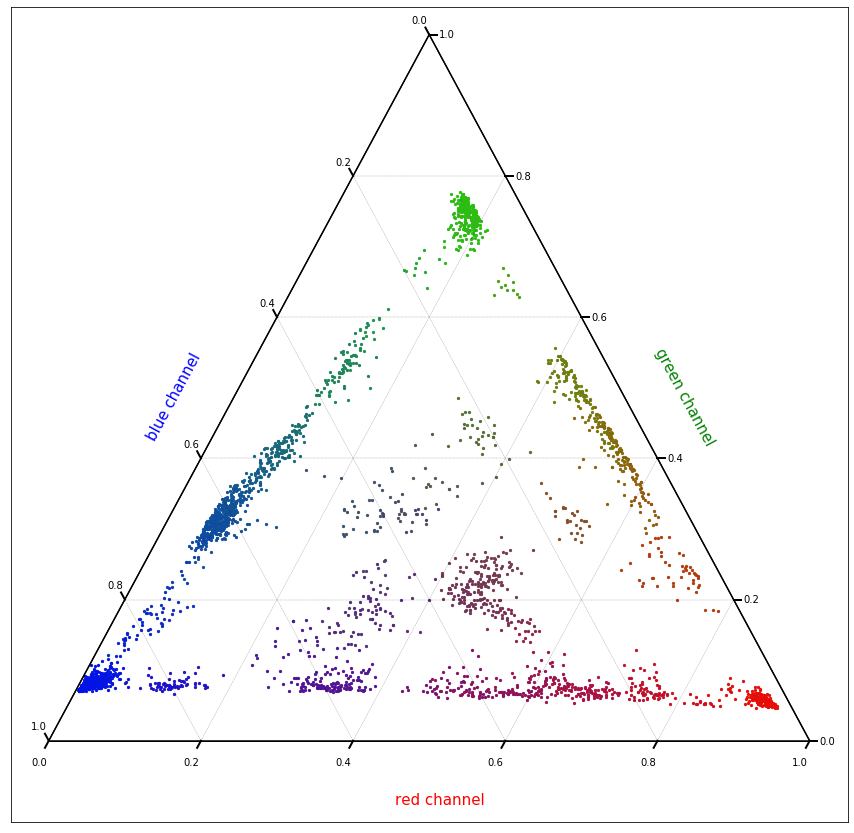

In [10]:
#return cells as ternary plot of RGB channel ration

figure, tax = ternary.figure(scale=1)
figure.set_size_inches(15, 15)
tax.clear_matplotlib_ticks()

tax.boundary(linewidth=1.5)
tax.gridlines(color='black', multiple=0.2, linewidth=0.3)

tax.get_axes().axis('on')
tax.ticks(axis='lbr', linewidth=2, multiple=0.2,tick_formats='%.1f')
tax.boundary(linewidth=1)

tax.bottom_axis_label('red channel', offset=-0.05, fontsize=15, color='red')
tax.right_axis_label('green channel', offset=0.1, fontsize=15, color='green')
tax.left_axis_label('blue channel', offset=0.1, fontsize=15, color='blue')

for i in tqdm(df2.index):
    
    point = [tuple([df2.loc[i].get('ratio_red'),df2.loc[i].get('ratio_green'),df2.loc[i].get('ratio_blue')])]
    color = df2.loc[i].get('cluster_hex')
    
    tax.scatter(point, marker='o', color=color, s=5)
    
ternary.plt.show()